In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read in the data and examine it

df = pd.read_csv("car_evaluation.csv")
df.head(10)

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
5  vhigh   vhigh  2   2    big   low  unacc
6  vhigh   vhigh  2   2    big   med  unacc
7  vhigh   vhigh  2   2    big  high  unacc
8  vhigh   vhigh  2   4  small   low  unacc
9  vhigh   vhigh  2   4  small   med  unacc

In [3]:
# check how many rows and columns

df.shape

(1727, 7)

In [4]:
# some info in type, null values, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
# checking for null values 
# this isn't strictly necessary here as we can compare the non-null value count
# to the number of observations in the data frame shape

df.isnull().values.any()

False

In [6]:
# more info on the data

df.describe()

vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209

In [7]:
# looking at the unique values for each attribute

print(df["vhigh"].unique())
print(df["vhigh.1"].unique())
print(df["2"].unique())
print(df["2.1"].unique())
print(df["small"].unique())
print(df["low"].unique())
print(df["unacc"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [8]:
# examining the distribution of values for attributes

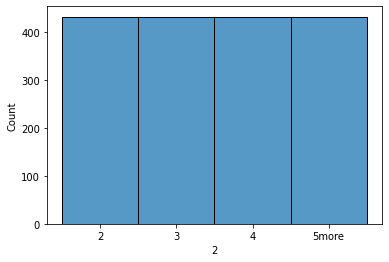

In [9]:
sns.histplot(data=df["2"])

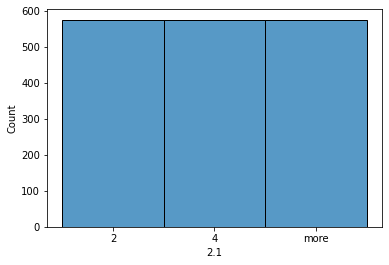

In [10]:
sns.histplot(data=df["2.1"])

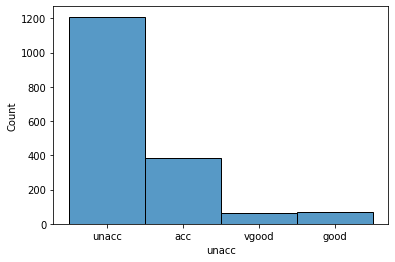

In [11]:
sns.histplot(data=df["unacc"])

In [12]:
# https://archive.ics.uci.edu/ml/datasets/car+evaluation
# renaming the attributes to something more descriptive and useable

df.rename({"vhigh": "buying_price",
           "vhigh.1": "maint_cost",
           "2": "doors",
           "2.1": "persons",
           "small": "lug_boot",
           "low": "safety",
           "unacc": "acceptability"
           }, axis=1, inplace=True)

df.head(10)

buying_price maint_cost doors persons lug_boot safety acceptability
0        vhigh      vhigh     2       2    small    med         unacc
1        vhigh      vhigh     2       2    small   high         unacc
2        vhigh      vhigh     2       2      med    low         unacc
3        vhigh      vhigh     2       2      med    med         unacc
4        vhigh      vhigh     2       2      med   high         unacc
5        vhigh      vhigh     2       2      big    low         unacc
6        vhigh      vhigh     2       2      big    med         unacc
7        vhigh      vhigh     2       2      big   high         unacc
8        vhigh      vhigh     2       4    small    low         unacc
9        vhigh      vhigh     2       4    small    med         unacc

In [13]:
# making a second data frame to convert all data to numeric
# just in case categorical values are required again

df2 = pd.read_csv("car_evaluation.csv")

In [14]:
df2.rename({"vhigh": "buying_price",
           "vhigh.1": "maint_cost",
           "2": "doors",
           "2.1": "persons",
           "small": "lug_boot",
           "low": "safety",
           "unacc": "acceptability"
           }, axis=1, inplace=True)

In [19]:
# converting categorical values to numeric

df2["buying_price"].replace("vhigh", 3, inplace=True)
df2["buying_price"].replace("high", 2, inplace=True)
df2["buying_price"].replace("med", 1, inplace=True)
df2["buying_price"].replace("low", 0, inplace=True)

df2["maint_cost"].replace("vhigh", 3, inplace=True)
df2["maint_cost"].replace("high", 2, inplace=True)
df2["maint_cost"].replace("med", 1, inplace=True)
df2["maint_cost"].replace("low", 0, inplace=True)

df2["lug_boot"].replace("big", 2, inplace=True)
df2["lug_boot"].replace("med", 1, inplace=True)
df2["lug_boot"].replace("small", 0, inplace=True)

df2["safety"].replace("high", 2, inplace=True)
df2["safety"].replace("med", 1, inplace=True)
df2["safety"].replace("low", 0, inplace=True)

In [16]:
# dropping the two awkward columns
# assuming these won't have much impact on the acceptability of a car

df2 = df.drop(["doors", "persons"], axis=1)

In [20]:
df2.head(10)

buying_price  maint_cost  lug_boot  safety acceptability
0             3           3         0       1         unacc
1             3           3         0       2         unacc
2             3           3         1       0         unacc
3             3           3         1       1         unacc
4             3           3         1       2         unacc
5             3           3         2       0         unacc
6             3           3         2       1         unacc
7             3           3         2       2         unacc
8             3           3         0       0         unacc
9             3           3         0       1         unacc

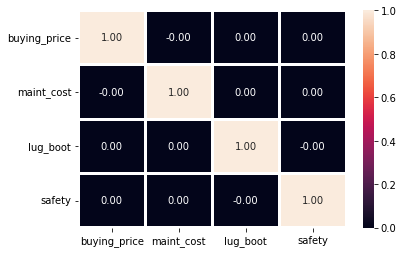

In [21]:
# correllation heat map

sns.heatmap(df2.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [22]:
# splitting the data for training and testing

train_data, test_data, train_label, test_label = train_test_split(df2.iloc[:, :3],
                                                                  df2.iloc[:, 4],
                                                                  test_size=0.2,
                                                                  random_state=42
                                                                  )

In [23]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((1381, 3), (1381,), (346, 3), (346,))

In [24]:
#classifying the data using the decision tree

classifier = DecisionTreeClassifier(max_depth=3, random_state=0)
classifier.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred = classifier.predict(test_data)

In [26]:
# classification report and confusion matrix

print(classification_report(test_label, y_pred))
plot_confusion_matrix(classifier, test_data, test_label, normalize='true')

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00        77
        good       0.00      0.00      0.00        15
       unacc       0.68      1.00      0.81       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.17      0.25      0.20       346
weighted avg       0.47      0.68      0.56       346



\* I have no idea what this means.  

In [27]:
print("Accuracy:",metrics.accuracy_score(test_label, y_pred))

Accuracy: 0.684971098265896


[Text(450.69230769230774, 475.65000000000003, 'X[1] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(240.3692307692308, 339.75, 'X[0] <= 1.5\ngini = 0.551\nsamples = 688\nvalue = [171, 54, 423, 40]'),
 Text(120.1846153846154, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.603\nsamples = 341\nvalue = [49, 54, 198, 40]'),
 Text(60.0923076923077, 67.94999999999999, 'gini = 0.538\nsamples = 114\nvalue = [26, 17, 71, 0]'),
 Text(180.27692307692308, 67.94999999999999, 'gini = 0.619\nsamples = 227\nvalue = [23, 37, 127, 40]'),
 Text(360.55384615384617, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.456\nsamples = 347\nvalue = [122, 0, 225, 0]'),
 Text(300.4615384615385, 67.94999999999999, 'gini = 0.318\nsamples = 116\nvalue = [23, 0, 93, 0]'),
 Text(420.6461538461539, 67.94999999999999, 'gini = 0.49\nsamples = 231\nvalue = [99, 0, 132, 0]'),
 Text(661.0153846153847, 339.75, 'X[0] <= 2.5\ngini = 0.334\nsamples = 693\nvalue = [136, 0, 549, 8]'),
 Text(600.923076923077, 203.8500

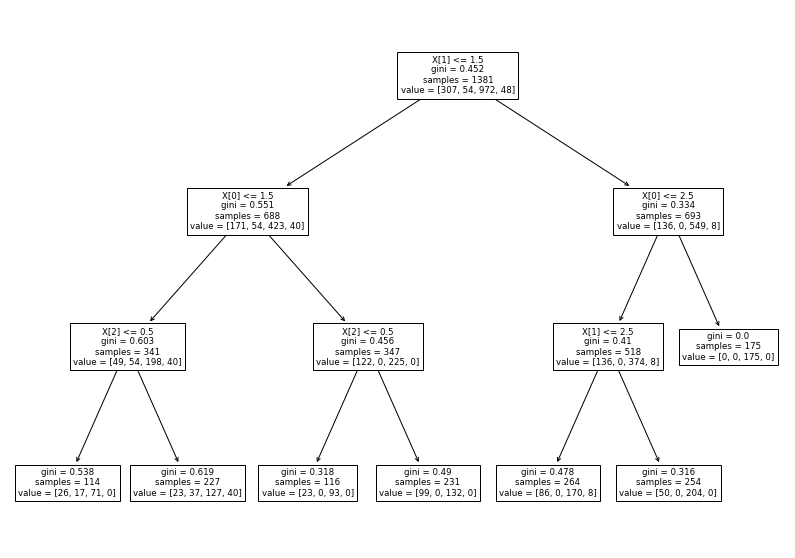

In [28]:
# plotting the decision tree

plt.figure(figsize = (14, 10))
tree.plot_tree(classifier.fit(train_data, train_label)) 

In [29]:
# classifying the data with the random forest

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_label, y_pred))

Accuracy: 0.684971098265896


              precision    recall  f1-score   support

         acc       0.00      0.00      0.00        77
        good       0.00      0.00      0.00        15
       unacc       0.68      1.00      0.81       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.17      0.25      0.20       346
weighted avg       0.47      0.68      0.56       346



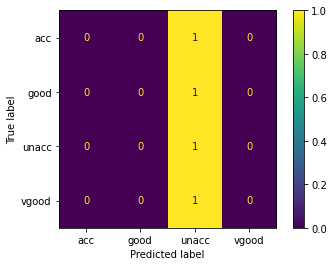

In [30]:
# classification report and confusion matrix

print(classification_report(test_label, y_pred))
plot_confusion_matrix(clf, test_data, test_label, normalize='true')

In [31]:
feature_imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

NameError: name 'feature_names' is not defined

In [32]:
len(clf.feature_importances_)

3

In [ ]:
len(df2.columns)

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")